# Импорты

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers.experimental.preprocessing import Resizing, Rescaling
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Загрузка данных

In [ ]:
image, label = tfds.as_numpy(tfds.load(
    "horses_or_humans", split="train", batch_size=-1, as_supervised=True
))

print(f"Обучающая выборка: {type(image)}, {image.shape}")

Обучающая выборка: <class 'numpy.ndarray'>, (1027, 300, 300, 3)


# Аугментация

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  Rescaling(1./255),
  Resizing(150, 150)
])

image = resize_and_rescale(image)

In [ ]:
image = np.array(image)
label = np.array(label)

In [ ]:
humans = image[np.where(np.isin(label, 1))]
horses = image[np.where(np.isin(label, 0))]

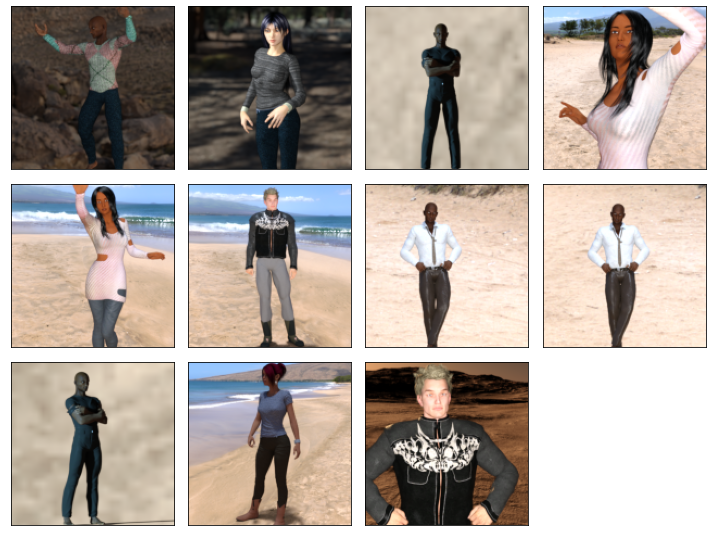

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(11):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(humans[i])
	# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

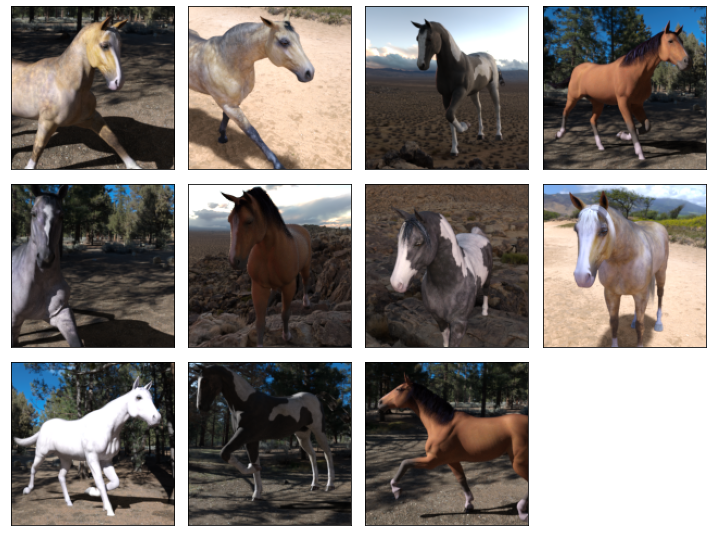

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(11):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(horses[i])
	# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

# Декодер

In [ ]:
def create_model():
    dims = 64

    # Энкодер
    input_shape = Input(shape=(150, 150, 3))
    flat = Flatten()(input_shape)
    X = Dense(dims*3, activation='relu')(flat)
    X = Dense(dims*2, activation='relu')(X)
    encode = Dense(dims, activation='linear')(X)
    
    # Декодер
    input_encode = Input(shape=(dims,))
    X = Dense(dims*2, activation='relu')(input_encode)
    X = Dense(dims*3, activation='relu')(X)
    flat_decode = Dense(150*150*3, activation='sigmoid')(X)
    decode = Reshape((150, 150, 3))(flat_decode)
    
    # Модели
    encoder = Model(input_shape, encode, name="encoder")
    decoder = Model(input_encode, decode, name="decoder")
    autoencoder = Model(input_shape, decoder(encoder(input_shape)), name="autoencoder")
    return encoder, decoder, autoencoder


optimizer = Adam(lr=1e-3)
encoder, decoder, autoencoder = create_model()
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
def give_image(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

# Humans

In [ ]:
autoencoder.fit(humans, humans,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=None)

Epoch 1/100
17/17 [==============================] - 6s 290ms/step - loss: 0.6762
Epoch 2/100
17/17 [==============================] - 5s 288ms/step - loss: 0.6466
Epoch 3/100
17/17 [==============================] - 5s 289ms/step - loss: 0.6326
Epoch 4/100
17/17 [==============================] - 5s 287ms/step - loss: 0.6223
Epoch 5/100
17/17 [==============================] - 5s 290ms/step - loss: 0.6219
Epoch 6/100
17/17 [==============================] - 5s 294ms/step - loss: 0.6056
Epoch 7/100
17/17 [==============================] - 5s 290ms/step - loss: 0.6007
Epoch 8/100
17/17 [==============================] - 5s 290ms/step - loss: 0.5956
Epoch 9/100
17/17 [==============================] - 5s 289ms/step - loss: 0.5955
Epoch 10/100
17/17 [==============================] - 5s 290ms/step - loss: 0.5874
Epoch 11/100
17/17 [==============================] - 5s 287ms/step - loss: 0.5899
Epoch 12/100
17/17 [==============================] - 5s 293ms/step - loss: 0.5859
Epoch 13/100


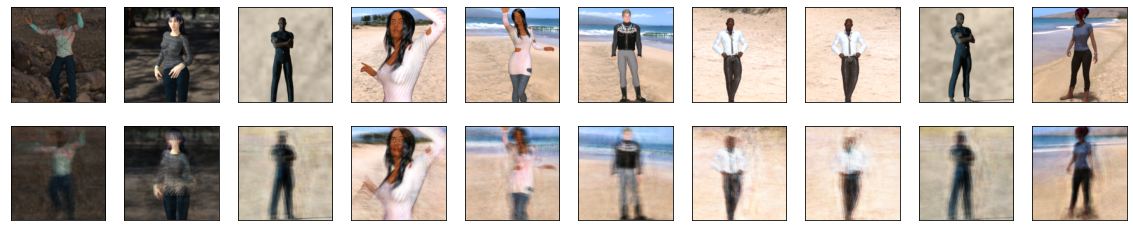

In [ ]:
n = 10

images = humans[:n]
encoded_images = encoder.predict(images, batch_size=n)
encoded_images[0]

decoded_images = decoder.predict(encoded_images, batch_size=n)

give_image(images, decoded_images)

# Horses

In [ ]:
autoencoder.fit(horses, horses,
                epochs=100,
                batch_size=32,
                shuffle=True,
                validation_data=None)

Epoch 1/100
16/16 [==============================] - 5s 291ms/step - loss: 0.6540
Epoch 2/100
16/16 [==============================] - 5s 291ms/step - loss: 0.6323
Epoch 3/100
16/16 [==============================] - 5s 292ms/step - loss: 0.6219
Epoch 4/100
16/16 [==============================] - 5s 291ms/step - loss: 0.6132
Epoch 5/100
16/16 [==============================] - 5s 294ms/step - loss: 0.6040
Epoch 6/100
16/16 [==============================] - 5s 290ms/step - loss: 0.5970
Epoch 7/100
16/16 [==============================] - 5s 292ms/step - loss: 0.5923
Epoch 8/100
16/16 [==============================] - 5s 291ms/step - loss: 0.5873
Epoch 9/100
16/16 [==============================] - 5s 291ms/step - loss: 0.5835
Epoch 10/100
16/16 [==============================] - 5s 291ms/step - loss: 0.5806
Epoch 11/100
16/16 [==============================] - 5s 290ms/step - loss: 0.5775
Epoch 12/100
16/16 [==============================] - 5s 292ms/step - loss: 0.5756
Epoch 13/100


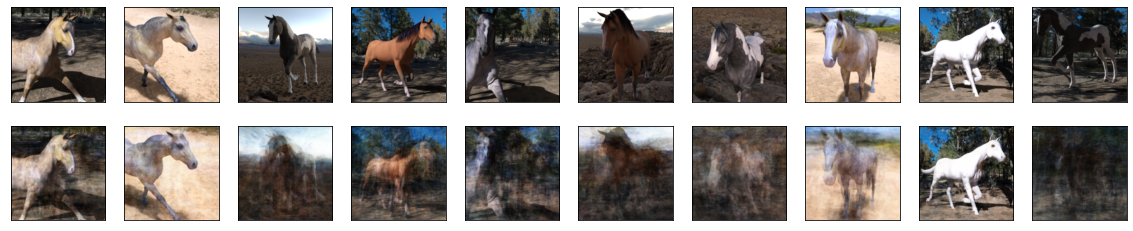

In [ ]:
n = 10

images = horses[:n]
encoded_images = encoder.predict(images, batch_size=n)
encoded_images[0]

decoded_images = decoder.predict(encoded_images, batch_size=n)

give_image(images, decoded_images)